# Perform Facial Recognition with Deep Learning in Keras Using CNN

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

from IPython.display import Image

Using TensorFlow backend.
C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saaim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [2]:
#Load the data
data = np.load('face/ORL_faces.npz')

In [3]:
type(data)

numpy.lib.npyio.NpzFile

In [4]:
lst = data.files

In [5]:
for item in lst:
    print(item)
    print(data[item])

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [6]:
x_train = data['trainX']
x_train.shape

(240, 10304)

In [7]:
x_test = data['testX']
x_test.shape

(160, 10304)

In [8]:
#normalize every image
x_train = np.array(x_train, dtype='float32')/255
x_test = np.array(x_test, dtype='float32')/255

In [9]:
y_train = data['trainY']
y_test = data['testY']
y_train.shape


(240,)

In [10]:
y_test.shape

(160,)

In [11]:
#Split the Data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.05, random_state=1234,)

In [12]:
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(228, 10304) (12, 10304) (228,) (12,)


In [13]:
#Change the size of the image

In [14]:
im_rows = 112
im_cols = 92

batch_size = 512
im_shape = (im_rows, im_cols, 1)

In [15]:
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

In [16]:
#Build the Model - CNN

In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape))
cnn_model.add(MaxPooling2D(pool_size=2))
cnn_model.add(Conv2D(filters=54, kernel_size=5, activation='relu', input_shape=im_shape))
cnn_model.add(MaxPooling2D(pool_size=2))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
cnn_model.add(Flatten())

cnn_model.add(Dense(2024, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(20, activation='softmax'))

In [19]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(lr=0.0001), 
    metrics=['accuracy'])

In [20]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2024)              49841000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2024)             

In [21]:
result = cnn_model.fit(
    np.array(x_train),
    np.array(y_train),
    batch_size=12,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
    callbacks = [EarlyStopping(patience = 3)]
    )

Train on 228 samples, validate on 12 samples
Epoch 1/250
 - 14s - loss: 3.0738 - accuracy: 0.0351 - val_loss: 2.9947 - val_accuracy: 0.0833
Epoch 2/250
 - 14s - loss: 2.9776 - accuracy: 0.0702 - val_loss: 2.9875 - val_accuracy: 0.1667
Epoch 3/250
 - 13s - loss: 2.9797 - accuracy: 0.0921 - val_loss: 2.9979 - val_accuracy: 0.0000e+00
Epoch 4/250
 - 14s - loss: 2.9634 - accuracy: 0.0921 - val_loss: 2.9676 - val_accuracy: 0.0000e+00
Epoch 5/250
 - 13s - loss: 2.9156 - accuracy: 0.1184 - val_loss: 2.9391 - val_accuracy: 0.0000e+00
Epoch 6/250
 - 14s - loss: 2.8520 - accuracy: 0.1798 - val_loss: 2.8852 - val_accuracy: 0.0000e+00
Epoch 7/250
 - 14s - loss: 2.6852 - accuracy: 0.2061 - val_loss: 2.6542 - val_accuracy: 0.0833
Epoch 8/250
 - 14s - loss: 2.4042 - accuracy: 0.3114 - val_loss: 2.3606 - val_accuracy: 0.2500
Epoch 9/250
 - 13s - loss: 2.1324 - accuracy: 0.3465 - val_loss: 1.9259 - val_accuracy: 0.5000
Epoch 10/250
 - 13s - loss: 1.8633 - accuracy: 0.4386 - val_loss: 1.6693 - val_accur

In [24]:
score = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

In [25]:
score

[0.4118020385503769, 0.9312499761581421]

In [29]:
print ('Accuracy score: ' + str(score[1]))

Accuracy score: 0.9312499761581421


In [30]:
print ('Loss: ' + str(score[0]))

Loss: 0.4118020385503769


In [32]:
#Plot the result

In [33]:
print(result.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


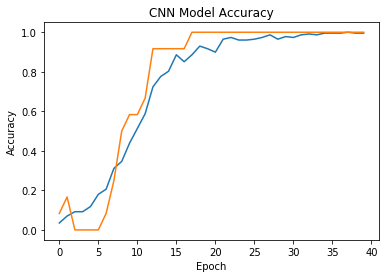

In [40]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

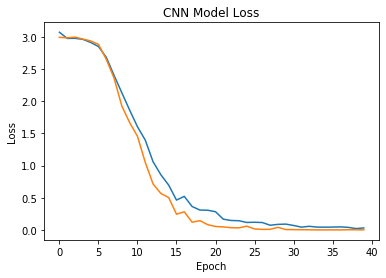

In [41]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [42]:
predict = np.array(cnn_model.predict(x_test))

In [45]:
new_y = cnn_model.predict_classes(x_test)

In [46]:
New_Accuracy = accuracy_score(y_test, new_y)

In [47]:
print(New_Accuracy)

0.93125


In [48]:
confusion_matrix_result = confusion_matrix(np.array(y_test), new_y)

In [50]:
print(confusion_matrix_result)

[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7]]


In [51]:
test2 = np_utils.to_categorical(y_test,20)

In [52]:
print(test2)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [53]:
print(classification_report(np.array(y_test), new_y))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      1.00      1.00         8
           2       0.89      1.00      0.94         8
           3       1.00      1.00      1.00         8
           4       1.00      0.62      0.77         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       0.89      1.00      0.94         8
           9       1.00      0.75      0.86         8
          10       0.89      1.00      0.94         8
          11       1.00      1.00      1.00         8
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.62      0.77         8
          16       1.00      1.00      1.00         8
          17       0.80    

In [55]:
#Accuracy is above 90%